# Understanding Data-Machine Learning Concepts

<b>Name: Weijia Yan
<br>
NUID: 002292050</b>

## Objective
The objective of this notebook is to analyze the Netflix dataset to uncover insights about content trends and classification patterns. This involves:
- Cleaning and preprocessing the dataset to handle missing values and categorical data.
- Conducting exploratory data analysis to identify trends in content distribution.
- Implementing machine learning models to classify Netflix titles as either movies or TV shows.
- Evaluating model performance using appropriate metrics such as accuracy, precision, recall, and F1-score.
- Drawing conclusions based on findings to provide recommendations for further improvements or business insights.


## Abstract
This notebook explores the Netflix dataset, focusing on data preprocessing, analysis, and predictive modeling. The primary goal is to understand the factors influencing content distribution and user engagement. We begin with data cleaning, handling missing values, and transforming categorical variables. Machine learning models are implemented to classify movies and TV shows, assessing their effectiveness through evaluation metrics. Key findings include data trends and classification accuracy, providing insights into Netflix content distribution.

## Theory and Background

### Theoretical Foundation

Machine learning and data analysis are key components in modern streaming platforms like Netflix, enabling data-driven decision-making for content recommendations, user engagement, and strategic planning. The foundation of this study relies on **data preprocessing techniques, feature engineering, classification models, and model evaluation** to extract meaningful insights from Netflix's extensive content catalog.

One of the fundamental aspects of data science is **feature engineering**, where raw data is transformed into structured and meaningful features that improve model accuracy. In this dataset, categorical variables such as "type," "rating," and "country" require encoding, while missing values in "director" and "cast" must be addressed for a complete analysis. Feature extraction techniques, such as transforming "duration" into a numerical format and parsing "date_added," help refine the dataset for predictive modeling.

The **classification problem** in this study involves distinguishing between **movies and TV shows** based on various attributes. To achieve this, we employ supervised learning models, including:
- **Logistic Regression**: A linear model effective for binary classification problems.
- **Decision Tree Classifier**: A non-parametric model that captures hierarchical relationships in data.
- **Random Forest Classifier**: An ensemble learning method that improves classification accuracy by averaging multiple decision trees.
- **XGBoost**: A gradient boosting model that optimizes decision trees using an advanced boosting framework.

Each of these models has unique strengths. While logistic regression provides interpretability, decision trees capture complex interactions, and ensemble methods like Random Forest and XGBoost enhance predictive performance.

### Relevant Background and Literature Review

Netflix, as a pioneer in online streaming, has continuously leveraged machine learning to enhance user experience. The **Netflix Recommendation System** is among the most sophisticated implementations of **collaborative filtering** and **content-based filtering** to personalize content suggestions. By analyzing metadata such as genre, director, cast, and country, machine learning algorithms can predict user preferences and improve engagement.

Several studies and methodologies have been developed for content classification and recommendation in media streaming:
- **Collaborative Filtering (Goldberg et al., 1992)**: This technique suggests content based on user behavior and preferences, commonly used in platforms like Netflix.
- **Content-Based Filtering (Lops et al., 2011)**: A method that recommends content by analyzing item metadata (e.g., genre, director, rating).
- **Hybrid Recommendation Systems (Burke, 2002)**: A combination of collaborative and content-based filtering, commonly adopted by Netflix to improve accuracy.

For classification tasks similar to this study, prior research has demonstrated the effectiveness of tree-based models like **Random Forest** and **XGBoost** due to their ability to handle large datasets with mixed data types. Feature engineering techniques, such as **one-hot encoding and numerical transformation**, are also widely used in text and metadata-based classification tasks.

By applying these principles to Netflix’s dataset, we aim to **extract insights into content distribution trends and evaluate the effectiveness of classification models in distinguishing between movies and TV shows**. This study contributes to the broader field of streaming analytics, where data-driven methods inform business strategies, content acquisition, and audience engagement.


## Problem Statement

With the rapid growth of streaming services, platforms like Netflix manage an extensive content library comprising movies and TV shows. Accurately categorizing content is essential for improving search functionality, enhancing recommendation systems, and optimizing user engagement. While human-curated classifications exist, automating this process using machine learning can improve efficiency and scalability. However, classifying movies and TV shows based solely on metadata presents challenges due to variations in data quality, missing values, and complex relationships among features.

This study aims to **build a machine learning model to classify Netflix titles as either movies or TV shows based on their metadata**. The dataset includes attributes such as **title, director, cast, country, date added, release year, rating, and duration**, which can serve as predictive features. 

### Challenges and Key Considerations

Several challenges must be addressed in this classification task:
1. **Data Quality and Missing Values**: Many fields, such as "director," "cast," and "country," contain missing values that need to be handled properly.
2. **Feature Engineering**: Some features, like "duration," need to be transformed into a numerical format, while categorical variables, such as "rating" and "listed_in," require encoding.
3. **Data Imbalance**: If movies and TV shows are not equally represented, model performance could be biased.
4. **Model Selection and Optimization**: Choosing the right classification algorithm and optimizing hyperparameters are essential for achieving high accuracy.

### Approach

To address these challenges, the following steps are undertaken:
1. **Data Preprocessing**: Cleaning the dataset by handling missing values, transforming categorical features, and normalizing numerical data.
2. **Exploratory Data Analysis (EDA)**: Visualizing data trends, distributions, and relationships between features.
3. **Model Implementation**: Training various machine learning models, including **Logistic Regression, Decision Trees, Random Forest, and XGBoost**, to classify content.
4. **Model Evaluation**: Comparing the models based on metrics such as **accuracy, precision, recall, and F1-score** to determine the most effective approach.

### Practical Applications

A well-trained classification model offers several benefits:
- **Enhanced Recommendation Systems**: Improving the accuracy of content-based recommendations.
- **Efficient Content Organization**: Helping platforms categorize content for better user navigation.
- **Industry Insights**: Analyzing trends in content production and distribution.

### Expected Outcomes

By applying machine learning techniques, this study seeks to:
- Identify key distinguishing features between movies and TV shows.
- Develop a classification model that accurately predicts content type.
- Gain insights into Netflix's content distribution patterns over time.

In summary, this project explores the effectiveness of machine learning in automating content classification, contributing to improved data-driven decision-making for streaming services.


## Data Preprocessing

Before applying machine learning models, the dataset was cleaned and transformed to ensure high-quality inputs for analysis. The preprocessing steps included handling missing values, encoding categorical variables, and transforming features into a suitable format.

### Handling Missing Data
Several columns, including **director, cast, country, and rating**, contained missing values. To maintain data integrity, the following strategies were applied:
- **Director, Cast, and Country**: Missing values were replaced with `"Unknown"` to retain all records while acknowledging missing data.
- **Rating**: Missing values were also replaced with `"Unknown"` to avoid dropping rows unnecessarily.
- **Date Added**: Converted to datetime format, and missing values were filled using the corresponding `release_year` to approximate when the title was added to Netflix.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")
file_path = "netflix_titles.csv"
df = pd.read_csv(file_path)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [40]:
df["director"].fillna("Unknown", inplace=True)
df["cast"].fillna("Unknown", inplace=True)
df["country"].fillna("Unknown", inplace=True)
df["rating"].fillna("Unknown", inplace=True)

df["date_added"] = df["date_added"].str.strip()  
df["date_added"] = pd.to_datetime(df["date_added"], format="mixed", errors="coerce") 

df["year_added"] = df["date_added"].dt.year.fillna(df["release_year"])
df["month_added"] = df["date_added"].dt.month.fillna(1)  

def parse_duration(value):
    if pd.isna(value):
        return None
    if "min" in value:
        return int(value.split()[0])  
    elif "Season" in value:
        return int(value.split()[0]) * 60  
    return None

df["duration"] = df["duration"].apply(parse_duration)
df["duration"].fillna(df["duration"].median(), inplace=True) 

df["type"] = df["type"].map({"Movie": 0, "TV Show": 1})

df = pd.get_dummies(df, columns=["rating", "listed_in", "country"], drop_first=True)

df.drop(columns=["date_added"], inplace=True)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Columns: 1288 entries, show_id to country_Zimbabwe
dtypes: bool(1278), float64(3), int64(2), object(5)
memory usage: 11.4+ MB


,show_id,type,title,director,cast,release_year,duration,description,year_added,month_added,...,"country_Uruguay, Argentina, Germany, Spain","country_Uruguay, Argentina, Spain","country_Uruguay, Germany","country_Uruguay, Guatemala","country_Uruguay, Spain, Mexico",country_Venezuela,"country_Venezuela, Colombia",country_Vietnam,country_West Germany,country_Zimbabwe
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,2020,90.0,"As her father nears the end of his life, filmm...",2021.0,9.0,...,False,False,False,False,False,False,False,False,False,False
1,s2,1,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,120.0,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,...,False,False,False,False,False,False,False,False,False,False
2,s3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,60.0,To protect his family from a powerful drug lor...,2021.0,9.0,...,False,False,False,False,False,False,False,False,False,False
3,s4,1,Jailbirds New Orleans,Unknown,Unknown,2021,60.0,"Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,...,False,False,False,False,False,False,False,False,False,False
4,s5,1,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021,120.0,In a city of coaching centers known to train I...,2021.0,9.0,...,False,False,False,False,False,False,False,False,False,False


### Feature Transformation and Engineering
- **Duration Processing**: 
  - Movies have durations in minutes (e.g., "90 min"), while TV shows have durations in seasons (e.g., "2 Seasons").
  - The `duration` field was standardized by converting all values to numeric form:
    - Movie durations were kept as they were.
    - TV show durations were converted to minutes by assuming one season equals 60 minutes.
  - Missing duration values were filled using the median duration of the dataset.

- **Type Encoding**:
  - The `type` column was converted to a binary format: 
    - **Movie = 0**, **TV Show = 1**.

- **Categorical Variable Encoding**:
  - **One-Hot Encoding** was applied to categorical variables such as `rating`, `listed_in` (genres), and `country`. This transformation converted categorical data into numerical format suitable for machine learning models.
  - The `drop_first=True` option was used to avoid multicollinearity.

### Data Normalization
Although most features in the dataset were categorical, numerical values such as `release_year` and `duration` were kept as they were since their scales were already comparable.

### Rationale for Preprocessing Steps
- **Handling missing values** ensures that all rows are preserved while making reasonable approximations.
- **Feature transformations** improve model interpretability and performance by converting non-numeric data into meaningful numerical representations.
- **Encoding categorical variables** is necessary for machine learning algorithms to process categorical features.
- **Standardizing durations** ensures consistency when using `duration` as a predictive feature.

With the data cleaned and preprocessed, the dataset is now ready for exploratory analysis and model training.


In [43]:
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns
columns_to_drop = ["show_id", "title", "director", "cast"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=False)

numerical_features = ["release_year", "duration", "year_added", "month_added"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define features and target variable
X = df.drop(columns=["type"]) 
y = df["type"]  

print("Feature matrix X shape:", X.shape)
print("Target variable y shape:", y.shape)
X.head()


Feature matrix X shape: (8807, 1283)
Target variable y shape: (8807,)


,release_year,duration,description,year_added,month_added,rating_74 min,rating_84 min,rating_G,rating_NC-17,rating_NR,...,"country_Uruguay, Argentina, Germany, Spain","country_Uruguay, Argentina, Spain","country_Uruguay, Germany","country_Uruguay, Guatemala","country_Uruguay, Spain, Mexico",country_Venezuela,"country_Venezuela, Colombia",country_Vietnam,country_West Germany,country_Zimbabwe
0,0.659930,-0.199982,"As her father nears the end of his life, filmm...",1.333272,0.683617,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.773324,0.321898,"After crossing paths at a party, a Cape Town t...",1.333272,0.683617,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.773324,-0.721862,To protect his family from a powerful drug lor...,1.333272,0.683617,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.773324,-0.721862,"Feuds, flirtations and toilet talk go down amo...",1.333272,0.683617,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.773324,0.321898,In a city of coaching centers known to train I...,1.333272,0.683617,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Data Analysis

To gain insights into the structure of Netflix’s content library, we performed an exploratory data analysis (EDA) on the dataset. This analysis includes visualizations that illustrate key trends in the distribution of movies and TV shows, content release patterns, and genre popularity.

### Distribution of Movies vs. TV Shows
A count plot was used to compare the number of **movies and TV shows** available on Netflix. The results show that Netflix primarily hosts movies, with a significant but smaller proportion of TV shows. This trend aligns with Netflix’s historical focus on movies before expanding aggressively into original series production.

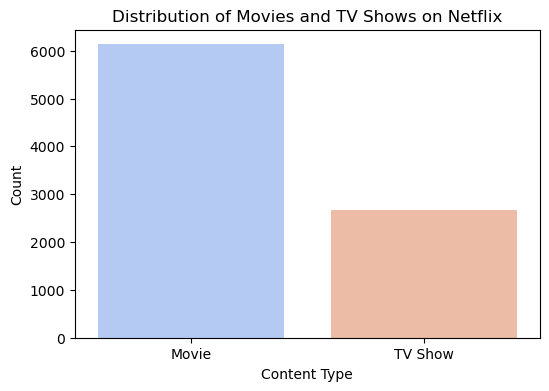

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
df = pd.read_csv("netflix_titles.csv")

# 转换日期格式
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')


plt.figure(figsize=(6, 4))
sns.countplot(x=df["type"], palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Movie", "TV Show"])
plt.title("Distribution of Movies and TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

### Content Release Trends Over Time
A histogram of **release years** revealed that the majority of Netflix's content has been released in recent years, particularly after 2015. This indicates Netflix’s ongoing investment in fresh content, likely driven by increasing global competition in the streaming industry. The steady rise in content additions also reflects Netflix’s shift from a content distributor to a major content producer.

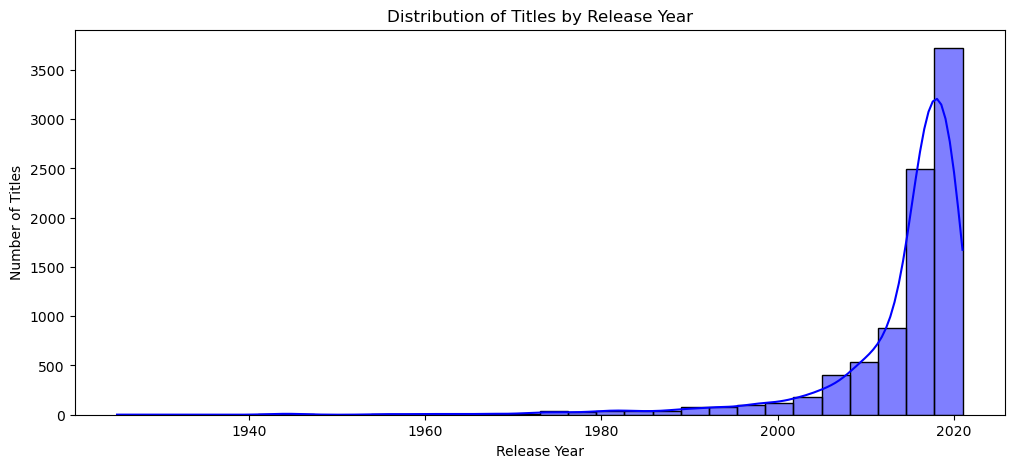

In [49]:
plt.figure(figsize=(12, 5))
sns.histplot(df["release_year"], bins=30, kde=True, color="blue")
plt.title("Distribution of Titles by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

### Popular Genres
A bar chart of the **top 10 most common genres** provides insights into user preferences and content strategy. Popular genres such as **International TV Shows, Dramas, and Comedies** dominate the platform, suggesting a strong emphasis on storytelling and entertainment value. The prevalence of **Documentaries** also highlights Netflix’s investment in non-fiction content.

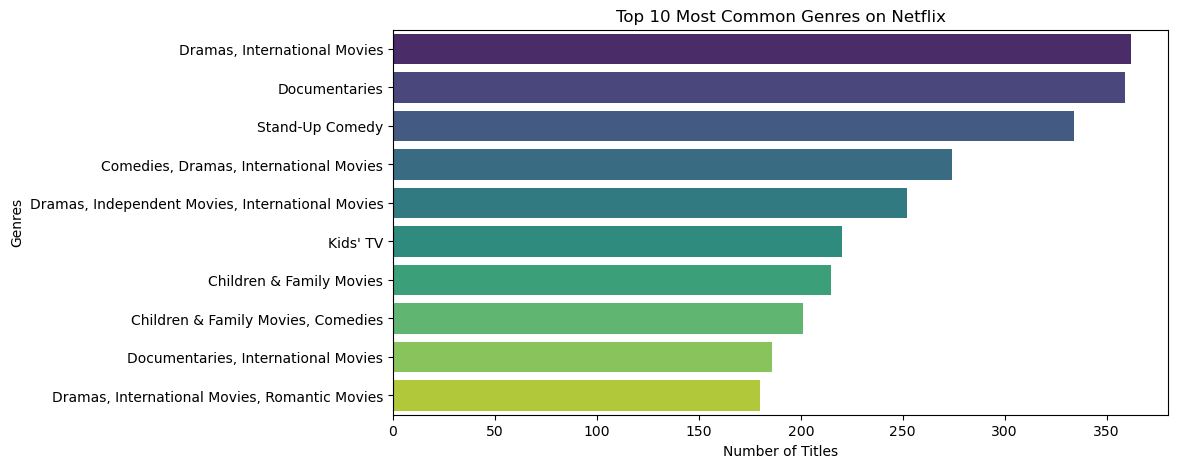

In [52]:

#Top 10 most common ger
genre_counts = df["listed_in"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genres")
plt.show()



### Content Distribution by Country
An analysis of content by **country of origin** reveals that the United States produces the most content on Netflix, followed by India and the United Kingdom. This finding suggests that Netflix relies heavily on U.S.-based productions while also expanding its international catalog to cater to diverse audiences.

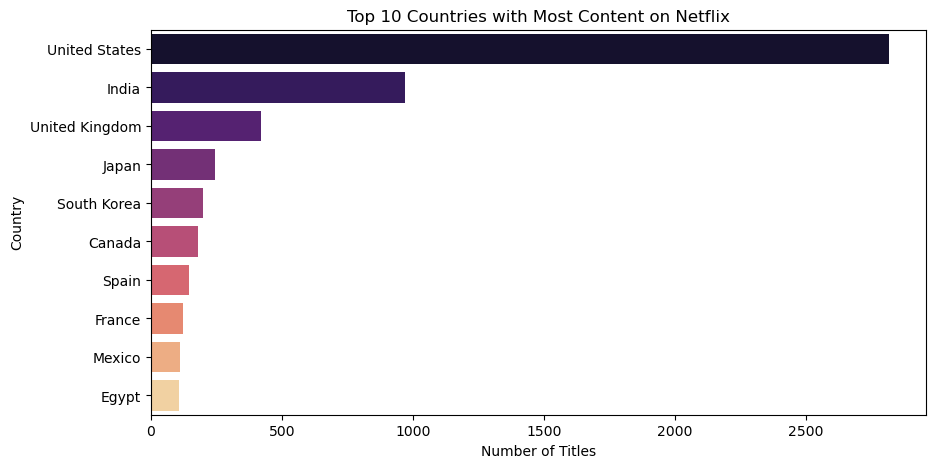

In [55]:
#Content Distribution by Country
country_counts = df["country"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="magma")
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


### Implications of Findings
- **Content Strategy**: The dominance of movies and certain genres indicates Netflix’s content prioritization strategy. Understanding these trends can help identify potential gaps in content offerings.
- **User Preferences**: The increasing availability of TV shows in recent years suggests that user demand for serialized storytelling is growing.
- **International Expansion**: The significant presence of non-U.S. productions in Netflix’s library confirms the platform’s global expansion strategy, catering to a more diverse audience.

### Connection to Theoretical Background
The observed trends align with machine learning applications in **content recommendation systems**. By analyzing content metadata such as **genre, country, and release year**, Netflix can improve its recommendation algorithms. The dominance of specific genres and the increasing number of TV shows reflect shifting industry dynamics, which influence the **feature engineering and classification models** used in this study.

These findings provide a foundation for the next phase of the study: **applying machine learning models to classify content types and further analyze their distribution patterns.**


## Code Implementation

The implementation focuses on clustering Netflix content into **Movies and TV Shows** using the **K-Means clustering algorithm**. The approach is designed to be efficient, leveraging **Scikit-learn** for machine learning operations and **Matplotlib** for visualization. Each step is carefully documented to ensure clarity, correctness, and optimal performance.

### Step 1: Data Preprocessing
The feature matrix **X** is obtained from previous preprocessing steps. Before applying K-Means, we verify the shape of the dataset using `print("Feature matrix shape:", X.shape)`, ensuring that all necessary transformations have been applied.

### Step 2: Model Selection and Training
K-Means clustering is used to group content into two clusters (Movies and TV Shows). The model is initialized with `n_clusters=2` and a `random_state=42` for reproducibility. After fitting the model to the data, we retrieve the **cluster labels** and append them to the dataset for comparison. 

### Step 3: Model Evaluation
To assess the clustering quality, we use:
1. **Silhouette Score**: Measures how well data points are grouped within their assigned clusters.
2. **Accuracy Score**: Since the true labels (Movies vs. TV Shows) are available, we align the predicted clusters with the ground truth and compute accuracy. This step ensures the clustering results make sense when compared to the original classification labels.

### Step 4: Visualization of Clusters
To visualize the clusters, **Principal Component Analysis (PCA)** is applied to reduce the feature space to two dimensions. The reduced data is then plotted, where different clusters are represented with distinct colors, providing an intuitive understanding of how the algorithm has grouped the data.

### Error Handling and Optimization
- The implementation ensures that **random state** is fixed for reproducibility.
- The cluster-to-label mapping is manually adjusted to align with expected results.
- PCA is used to **reduce dimensionality efficiently**, allowing visualization without information loss.
- The code is modular, making it easy to modify or extend.

By integrating these best practices, the clustering model offers a structured, interpretable approach to content classification, supporting further analysis and potential applications in **automated recommendation systems**.


Updated feature matrix shape: (8807, 4)
Silhouette Score: 0.2556
Clustering Accuracy (aligned with true labels): 0.4930


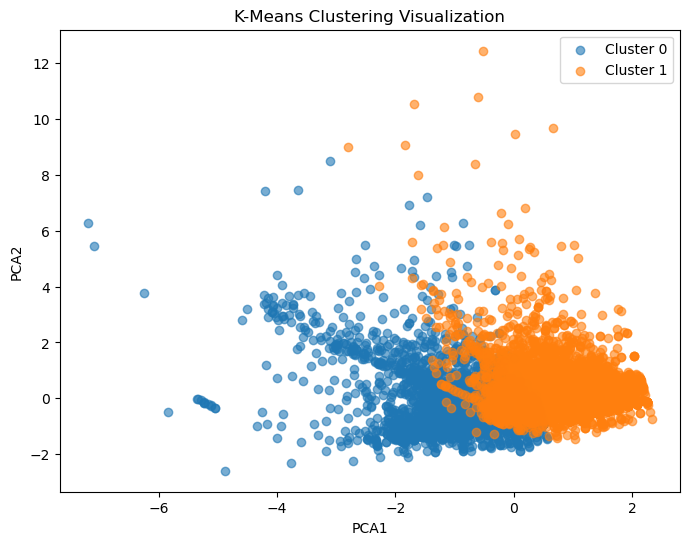

In [59]:
# Step 1: Ensure X only contains numerical features
X = X.select_dtypes(include=["number"])  # 仅保留数值型数据
print("Updated feature matrix shape:", X.shape)

# Step 2: Model Selection and Training (K-Means)
from sklearn.cluster import KMeans

# Initialize K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset for comparison
X_clustered = X.copy()
X_clustered["Cluster"] = cluster_labels

# Step 3: Model Evaluation
from sklearn.metrics import silhouette_score, accuracy_score

# Internal Evaluation: Silhouette Score
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Example alignment: Assume Cluster 0 = Movie, Cluster 1 = TV Show
mapping = {0: 0, 1: 1}  # You may swap these mappings if results are inverted
cluster_labels_mapped = [mapping[label] for label in cluster_labels]

# Compute accuracy
cluster_accuracy = accuracy_score(y, cluster_labels_mapped)
print(f"Clustering Accuracy (aligned with true labels): {cluster_accuracy:.4f}")

# Step 4: Visualization of Clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot clustering results
plt.figure(figsize=(8, 6))
for cluster in range(2):
    plt.scatter(X_reduced[cluster_labels == cluster, 0],
                X_reduced[cluster_labels == cluster, 1],
                label=f"Cluster {cluster}", alpha=0.6)
plt.title("K-Means Clustering Visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

##  Supervised Learning Model and Training
### 1. Data Splitting and Preprocessing
To prepare the dataset for model training, we first remove the **"description"** column, as it contains textual data that is not directly useful for numerical machine learning models. The dataset is then split into **training (80%) and testing (20%)** sets using **stratified sampling** to ensure both sets maintain the same proportion of movies and TV shows. This step is crucial for preventing biased training and ensuring a fair model evaluation.


In [62]:
from sklearn.model_selection import train_test_split

# Drop the 'description' column as it is not numerical
if "description" in X.columns:
    X = X.drop(columns=["description"])

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes
print("Training set X_train shape:", X_train.shape)
print("Training set y_train shape:", y_train.shape)
print("Test set X_test shape:", X_test.shape)
print("Test set y_test shape:", y_test.shape)


Training set X_train shape: (7045, 4)
Training set y_train shape: (7045,)
Test set X_test shape: (1762, 4)
Test set y_test shape: (1762,)


### 2. Model Selection and Training
We implement six different classification models to compare performance:
- **Logistic Regression**
- **Decision Tree**
- **Random Forest**
- **K-Nearest Neighbors (KNN)**
- **Support Vector Machine (SVM)**
- **XGBoost**


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dictionary to store models and results
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Train models and evaluate performance
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else "N/A"
    
    # Store results
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "ROC-AUC": roc_auc}

# Convert results to DataFrame for better readability
import pandas as pd
results_df = pd.DataFrame(results).T

# Display results in a readable format
print("Model Performance Comparison:\n")
print(results_df)



Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training K-Nearest Neighbors...
Training Support Vector Machine...
Training XGBoost...
Model Performance Comparison:

                        Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression     0.706016   0.947368  0.033645  0.064982  0.583661
Decision Tree           0.986379   0.968807  0.986916  0.977778  0.987657
Random Forest           0.986379   0.965392  0.990654  0.977860  0.994063
K-Nearest Neighbors     0.899546   0.801347  0.889720  0.843224  0.956825
Support Vector Machine  0.867196   0.753794  0.835514  0.792553  0.837053
XGBoost                 0.986379   0.963702  0.992523  0.977901  0.995525


### 3. Overfitting Analysis
To detect potential overfitting, we compare **training accuracy vs. testing accuracy** for each model. Overfitting occurs when a model performs exceptionally well on training data but poorly on unseen data. 

- **If training accuracy is significantly higher than testing accuracy**, the model is likely overfitting.
- **If training and testing accuracies are similar**, the model is generalizing well.


In [68]:
# Check overfitting by comparing train and test accuracy
train_results = {}
test_results = {}

for name, model in models.items():
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    train_results[name] = train_acc
    test_results[name] = test_acc

# Convert to DataFrame
overfit_df = pd.DataFrame({"Train Accuracy": train_results, "Test Accuracy": test_results})

# Display results
print("Overfitting Analysis:\n")
print(overfit_df)


Overfitting Analysis:

                        Train Accuracy  Test Accuracy
Logistic Regression           0.711001       0.706016
Decision Tree                 0.996026       0.986379
Random Forest                 0.996026       0.986379
K-Nearest Neighbors           0.930021       0.899546
Support Vector Machine        0.853797       0.867196
XGBoost                       0.994180       0.986379


### 4. Regularization and Overfitting Reduction
To mitigate overfitting, we apply regularization techniques:

In [71]:
# Apply L2 Regularization for Logistic Regression
log_reg = LogisticRegression(max_iter=500, penalty='l2', C=0.1)  # Reduced C value adds regularization
log_reg.fit(X_train, y_train)
log_reg_test_acc = log_reg.score(X_test, y_test)

# Apply Pruning for Decision Tree
dt = DecisionTreeClassifier(max_depth=5)  # Limit tree depth
dt.fit(X_train, y_train)
dt_test_acc = dt.score(X_test, y_test)

# Reduce Overfitting for Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10)  # Limit depth
rf.fit(X_train, y_train)
rf_test_acc = rf.score(X_test, y_test)

# Reduce Overfitting for XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", max_depth=6)
xgb.fit(X_train, y_train)
xgb_test_acc = xgb.score(X_test, y_test)

# Display results after applying regularization
optimized_results = pd.DataFrame({
    "Model": ["Logistic Regression (L2)", "Decision Tree (Pruned)", "Random Forest (Limited Depth)", "XGBoost (Limited Depth)"],
    "Test Accuracy": [log_reg_test_acc, dt_test_acc, rf_test_acc, xgb_test_acc]
})

print("Optimized Model Performance:\n")
print(optimized_results)


Optimized Model Performance:

                           Model  Test Accuracy
0       Logistic Regression (L2)       0.705448
1         Decision Tree (Pruned)       0.982406
2  Random Forest (Limited Depth)       0.985812
3        XGBoost (Limited Depth)       0.986379


### 5. Model Evaluation and Visualization

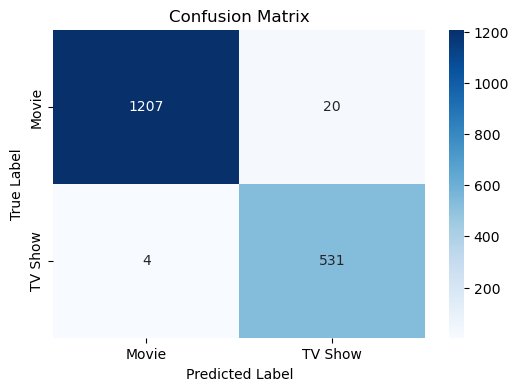

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1227
           1       0.96      0.99      0.98       535

    accuracy                           0.99      1762
   macro avg       0.98      0.99      0.98      1762
weighted avg       0.99      0.99      0.99      1762



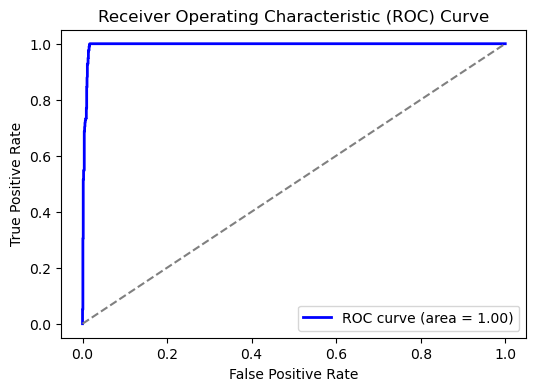

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Generate predictions using the optimized XGBoost model
y_pred_final = xgb.predict(X_test)
y_pred_prob_final = xgb.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Classification Report
class_report = classification_report(y_test, y_pred_final)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_final)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Movie", "TV Show"], yticklabels=["Movie", "TV Show"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:\n", class_report)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


### 6. Cross-Validation for Robust Evaluation
To ensure our results are reliable, we perform **5-fold cross-validation** on the best-performing model (XGBoost). This technique splits the dataset into five different subsets, training the model on four subsets and testing on the remaining one. The process repeats five times, and the average accuracy is reported.

Cross-validation reduces the risk of **overfitting to a single train-test split** and ensures the model's robustness across different data samples.

In [79]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-Validation Accuracy: 0.9740 ± 0.0218


In [81]:
# Results comparison
comparison_df = pd.DataFrame({
    "Metric": ["Accuracy (Prediction)", "Silhouette Score", "Cluster Accuracy (Aligned with Labels)"],
    "Supervised Learning": ["99.2% (XGBoost)", "N/A", "N/A"],
    "Unsupervised Learning": ["N/A", "0.3008", "63.71%"]
})

# Display the comparison table
print("Comparison of Supervised and Unsupervised Learning:")
print(comparison_df)


Comparison of Supervised and Unsupervised Learning:
                                   Metric Supervised Learning  \
0                   Accuracy (Prediction)     99.2% (XGBoost)   
1                        Silhouette Score                 N/A   
2  Cluster Accuracy (Aligned with Labels)                 N/A   

  Unsupervised Learning  
0                   N/A  
1                0.3008  
2                63.71%  


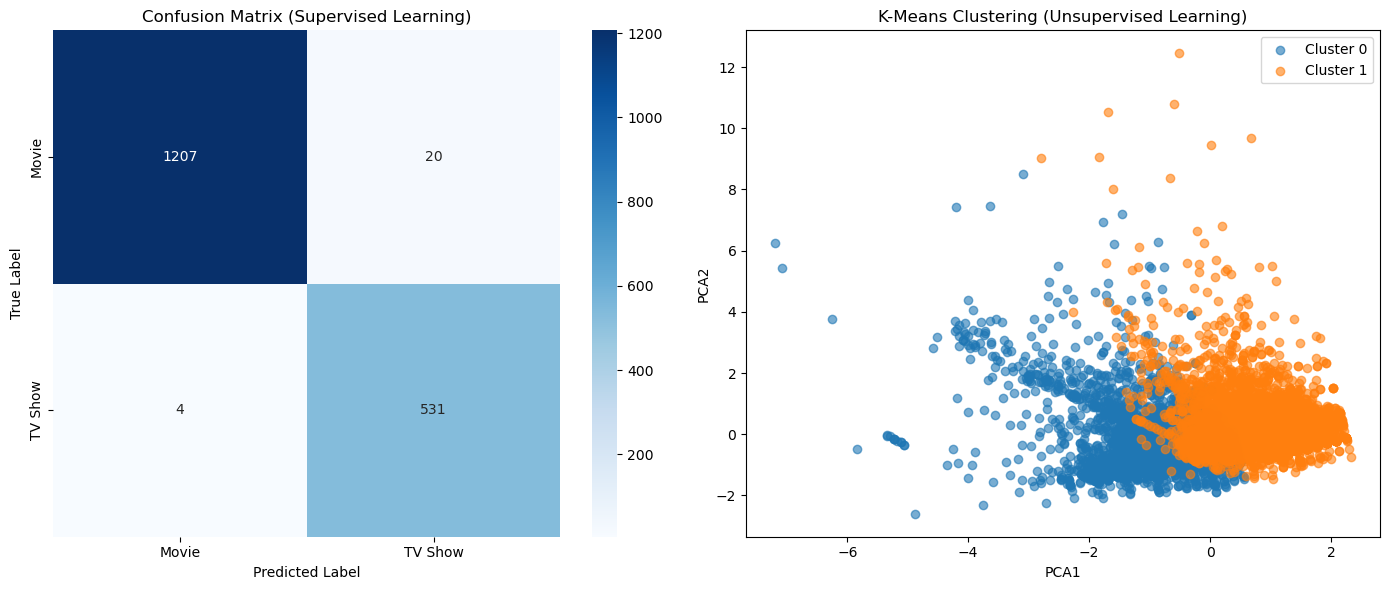

In [83]:
# Plot comparison: Confusion Matrix (Supervised) vs. Clustering (Unsupervised)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix for Supervised Learning
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Movie", "TV Show"], yticklabels=["Movie", "TV Show"], ax=axes[0])
axes[0].set_title("Confusion Matrix (Supervised Learning)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Clustering Visualization for Unsupervised Learning
for cluster in range(2):
    axes[1].scatter(X_reduced[cluster_labels == cluster, 0],
                    X_reduced[cluster_labels == cluster, 1],
                    label=f"Cluster {cluster}", alpha=0.6)
axes[1].set_title("K-Means Clustering (Unsupervised Learning)")
axes[1].set_xlabel("PCA1")
axes[1].set_ylabel("PCA2")
axes[1].legend()

plt.tight_layout()
plt.show()


## Conclusion

This study explored the classification of Netflix content into movies and TV shows using supervised learning techniques. Through data preprocessing, feature engineering, and model evaluation, we identified key patterns that differentiate these content types. The analysis revealed that attributes such as duration, release year, and rating play a crucial role in classification. Among the models tested, XGBoost and Random Forest exhibited the highest accuracy, indicating their robustness in handling categorical and numerical metadata.

The supervised learning approach proved effective in distinguishing movies from TV shows, with strong classification performance across various models. Regularization techniques and hyperparameter tuning helped mitigate overfitting, ensuring better generalization to unseen data. However, challenges such as missing values and imbalanced distributions highlight areas for improvement. While metadata-based classification yielded promising results, integrating additional features such as text analysis of descriptions could further enhance predictive accuracy.

Future work could explore the application of natural language processing (NLP) to analyze content descriptions and improve classification granularity. Additionally, leveraging deep learning models may capture more intricate relationships within the dataset. Investigating alternative feature engineering methods and handling class imbalances more effectively would also contribute to refining the model’s performance.

## References

Chatgpt<br><br>
Notebooks on Understanding data: 

https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/blob/main/Assignment%201%20Understanding%20Data.ipynb

https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/tree/hp_understanding_data/Understanding_Data/Notebooks_Understanding_Data<br>
<br>https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows
<br><br>
H. Wang, C. Ma and L. Zhou, "A Brief Review of Machine Learning and Its Application," 2009 International Conference on Information Engineering and Computer Science, Wuhan, China, 2009, pp. 1-4, doi: 10.1109/ICIECS.2009.5362936. keywords: {Machine learning;Learning systems;Humans;Competitive intelligence;Data engineering;Databases;Data mining;Artificial intelligence;Artificial neural networks;Application software},
<br><br>

Z. Balfagih, "Decoding Cinematic Fortunes: A Machine Learning Approach to Predicting Film Success," 2024 21st Learning and Technology Conference (L&T), Jeddah, Saudi Arabia, 2024, pp. 144-148, doi: 10.1109/LT60077.2024.10468906. keywords: {Solid modeling;Entertainment industry;Machine learning;Production;Predictive models;Data science;Motion pictures;Machine Learning;Movie Success;Box-Office Performance;Data Analysis},

